In [66]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import numpy as np
import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [67]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [74]:
def mean_in_bins_err(x,y,x1,x2,nbins):
    mean_x = np.zeros(nbins)
    mean_y = np.zeros(nbins)
    #err_y_low = np.zeros(nbins)
    #err_y_high = np.zeros(nbins)
    err_y = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        sel = np.where((x>x_low)&(x<x_high))
        mean_y[i] = np.mean(y[sel])
        err_y[i] = np.std(y[sel])
        mean_x[i] = np.mean(x[sel])
    return np.array(mean_x),np.array(mean_y),err_y

In [75]:
T = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99,
            dtype={'WEIGHT_GRAMS': float,
                   'GEST_AGE_DAYS':float,
                   'DELTA_SEC_MEASURE':float,
                   'MED_SPO2':float,
                   'MED_PI':float,
                   'MED_PR':float,
                   'MEAN_SPO2':float,
                   'MEAN_PI':float,
                   'MEAN_PR':float,
                   'STD_SPO2':float,
                   'STD_PI':float,
                   'STD_PR':float,
                   'BRADY_SEC_PR':float,
                   'BRADY_RATIO_PR':float,
                   'BRADY_RATIO_PR_m10':float,
                   'BRADY_RATIO_PR_m20':float,
                   'BRADY_RATIO_PR_m30':float,
                   'BRADY_RATIO_PR_m40':float,
                   'BRADY_SEC_SPO2':float,
                   'BRADY_RATIO_SPO2':float,
                   'BRADY_SEC_PR_DYN':float,
                   'BRADY_RATIO_PR_DYN':float})

In [7]:
T.columns.values

array(['BABY_IDS', 'GENDER', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS', 'DELIVERY',
       'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2', 'MED_PR',
       'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2', 'STD_PR',
       'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR', 'BRADY_RATIO_PR',
       'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20', 'BRADY_RATIO_PR_m30',
       'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2', 'BRADY_RATIO_SPO2',
       'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN'], dtype=object)

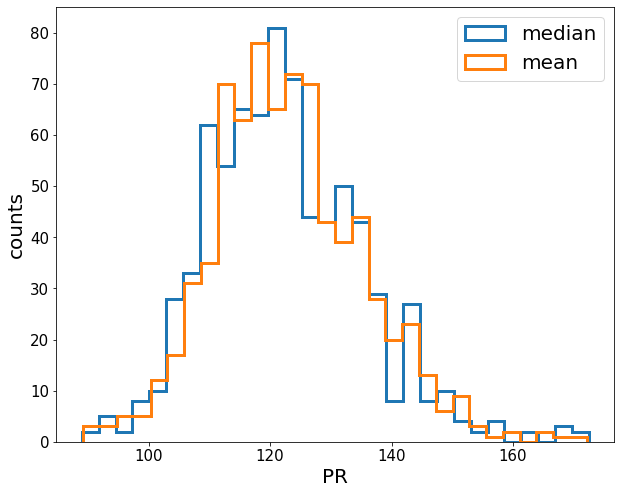

In [36]:
plt.figure(figsize=(10,8))
plt.hist(T['MED_PR'] ,bins=30,histtype='step',lw=3,label='median')
plt.hist(T['MEAN_PR'],bins=30,histtype='step',lw=3,label='mean')
plt.xlabel('PR')
plt.ylabel('counts')
plt.legend()
plt.show()

In [40]:
T['BABY_IDS'][T['MED_PR']<90]

641    FMC133
Name: BABY_IDS, dtype: object

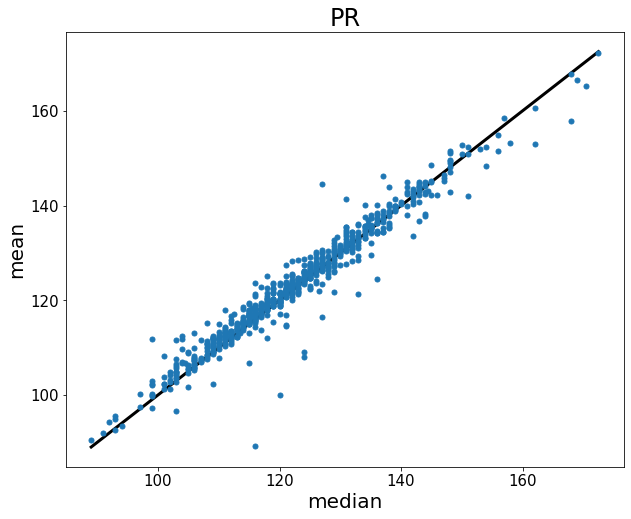

In [61]:
plt.figure(figsize=(10,8))

x0 = np.min(T['MED_PR'])
x1 = np.max(T['MED_PR'])

plt.plot([x0,x1],[x0,x1],color='k',lw=3)

x = T['MED_PR']
y = T['MEAN_PR']
plt.plot(x,y,".",markersize=10)

plt.xlabel('median')
plt.ylabel('mean')
plt.title('PR')
plt.show()

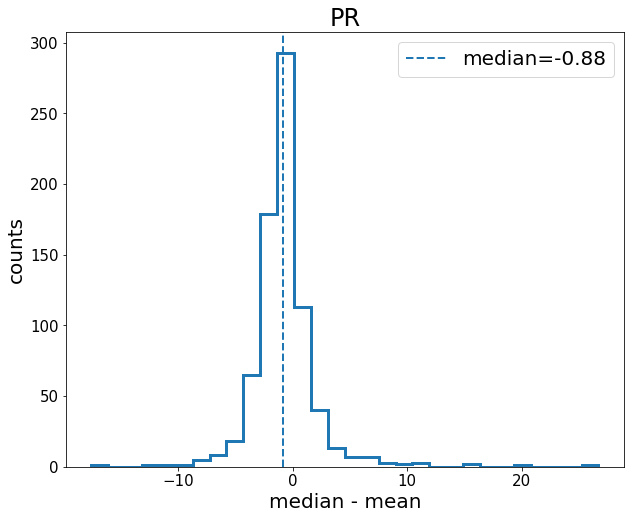

In [69]:
plt.figure(figsize=(10,8))
diff = T['MED_PR']-T['MEAN_PR']
plt.hist(diff,bins=30,histtype='step',lw=3)
plt.axvline(np.median(diff),ls='dashed',lw=2,label='median=%.2f'%np.median(diff))
plt.xlabel('median - mean')
plt.ylabel('counts')
plt.title('PR')
plt.legend()
plt.show()

In [103]:
T['BABY_IDS'][np.abs(T['MED_PR']-T['MEAN_PR'])>10]

48      FMC012
87      FMC019
189    PLC 012
199    PLC 013
219    PLC 015
339     PLC024
344     PLC026
386     FMC082
434    PLC 028
493    PLC 035
567     FMC117
Name: BABY_IDS, dtype: object

In [104]:
len(T['BABY_IDS'][np.abs(T['MED_PR']-T['MEAN_PR'])>10])

11

In [9]:
files_to_adjast = T['FILE'][np.abs(T['MED_PR']-T['MEAN_PR'])>10]

In [10]:
for f in files_to_adjast:
    print(f)

/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_012/G_PHN_FMC012_Day4_Rt wrist.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_019/G_PHN_FMC019_Day3_Rt wrist.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC012/G_PLC012_Day1_Foot.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC013/G_PLC013_Day1_foot.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC015/G_PLC015_Day2_Foot.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC024/G_PLC024_Day1_Rt wrist.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC_PHN_026/G_PLC026_Day1_Rt foot.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_082/G_PHN_FMC082_Day5_Rt wrist.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day2_Rt Foot.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Wrist.csv
/home/giorgio/Desktop/NHS/TOST_data/TOST F

## Let's look at the 11 babies with mean very different from median

In [11]:
FMC012 = baby('FMC012')

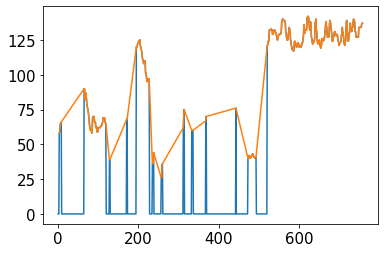

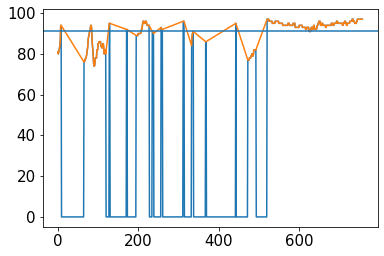

In [43]:
pr=FMC012.measurements[3]['PR']
spo2=FMC012.measurements[3]['SpO2']

plt.plot(pr)
plt.plot(pr[pr>10.])
plt.show()

plt.plot(spo2)
plt.plot(spo2[spo2>10.])
plt.axhline(FMC012.measurements_SpO2_mean[3])
plt.show()

In [33]:
FMC012.measurements_date

['14-10-03', '14-10-03', '03/13/14', '03/13/14']

In [36]:
FMC012.measurements[3]['Time']

0      10:12:17
1      10:12:19
2      10:12:21
3      10:12:23
4      10:12:25
         ...   
754    10:37:25
755    10:37:27
756    10:37:29
757    10:37:31
758    10:37:33
Name: Time, Length: 759, dtype: object

In [37]:
FMC012.measurements_datetime

[datetime.datetime(2014, 3, 10, 11, 16, 35),
 datetime.datetime(2014, 3, 10, 11, 15, 43),
 datetime.datetime(2014, 3, 13, 10, 14, 39),
 datetime.datetime(2014, 3, 13, 10, 12, 17)]

In [ ]:


FMC012.measurements_wrist

In [29]:
FMC012.measurements_datetime

[datetime.datetime(2014, 3, 10, 11, 16, 35),
 datetime.datetime(2014, 3, 10, 11, 15, 43),
 datetime.datetime(2014, 3, 13, 10, 14, 39),
 datetime.datetime(2014, 3, 13, 10, 12, 17)]

# SpO2

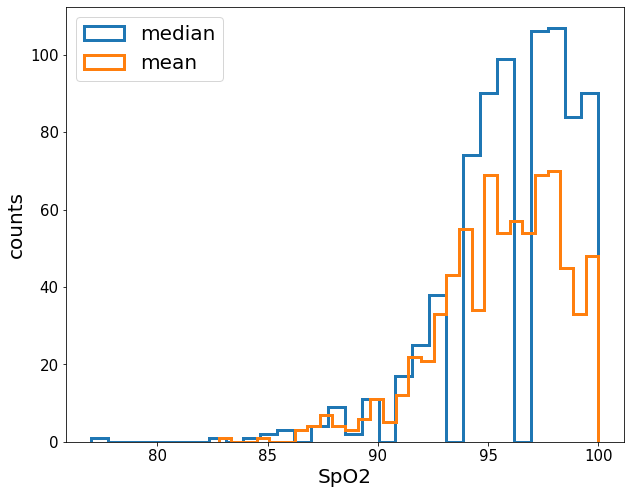

In [55]:
plt.figure(figsize=(10,8))
plt.hist(T['MED_SPO2'] ,bins=30,histtype='step',lw=3,label='median')
plt.hist(T['MEAN_SPO2'],bins=30,histtype='step',lw=3,label='mean')
plt.xlabel('SpO2')
plt.ylabel('counts')
plt.legend(loc=2)
plt.show()

In [56]:
ss.ks_2samp(T['MED_SPO2'],T['MEAN_SPO2'])

Ks_2sampResult(statistic=0.16753926701570676, pvalue=7.369883286719424e-10)

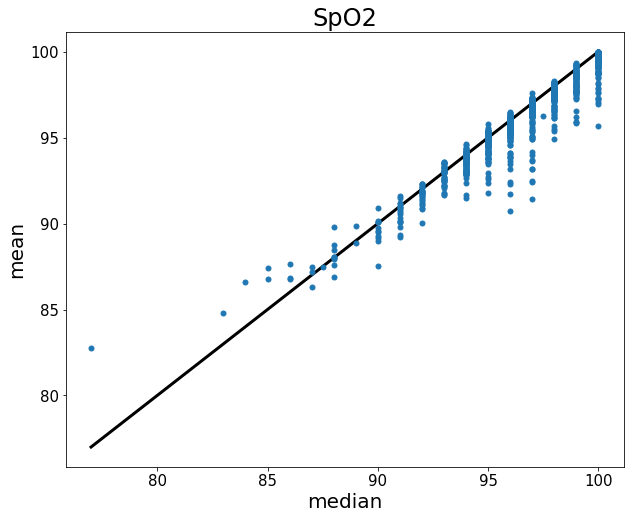

In [62]:
plt.figure(figsize=(10,8))

x0 = np.min(T['MED_SPO2'])
x1 = np.max(T['MED_SPO2'])

plt.plot([x0,x1],[x0,x1],color='k',lw=3)

x = T['MED_SPO2']
y = T['MEAN_SPO2']
plt.plot(x,y,".",markersize=10)

plt.xlabel('median')
plt.ylabel('mean')
plt.title('SpO2')
plt.show()

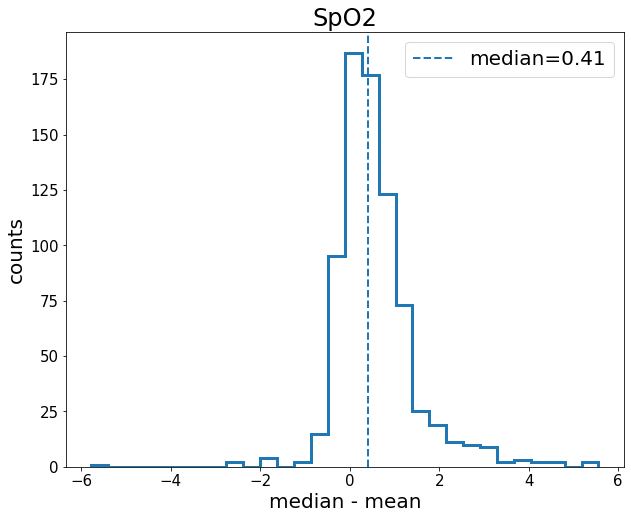

In [67]:
plt.figure(figsize=(10,8))
diff = T['MED_SPO2']-T['MEAN_SPO2']
plt.hist(diff,bins=30,histtype='step',lw=3)
plt.axvline(np.median(diff),ls='dashed',lw=2,label='median=%.2f'%np.median(diff))
plt.xlabel('median - mean')
plt.ylabel('counts')
plt.title('SpO2')
plt.legend()
plt.show()

# PI

/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/giorgio/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


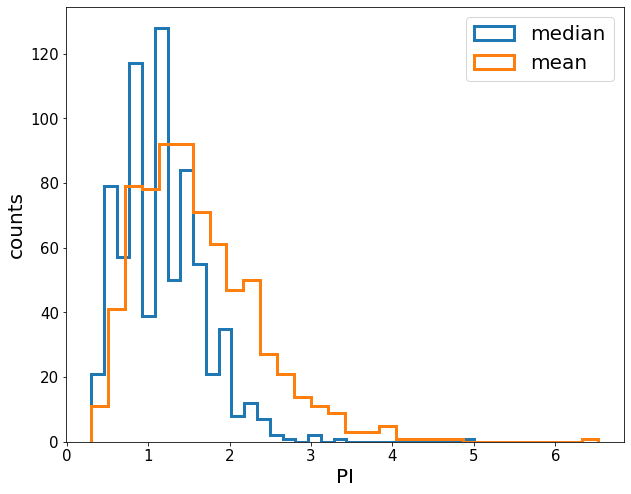

In [71]:
plt.figure(figsize=(10,8))
plt.hist(T['MED_PI'] ,bins=30,histtype='step',lw=3,label='median')
plt.hist(T['MEAN_PI'],bins=30,histtype='step',lw=3,label='mean')
plt.xlabel('PI')
plt.ylabel('counts')
plt.legend(loc=1)
plt.show()

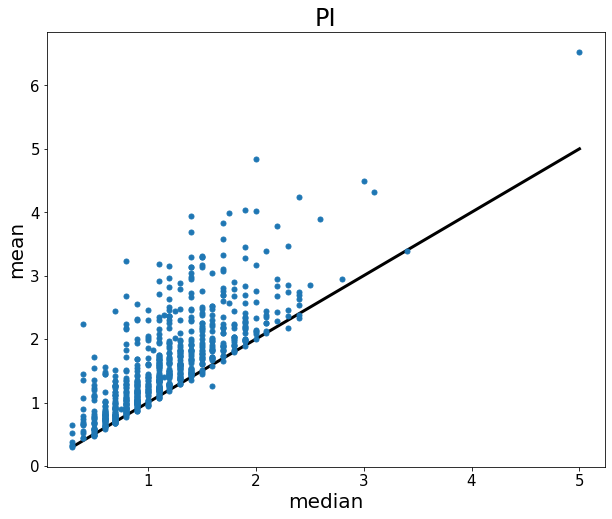

In [73]:
plt.figure(figsize=(10,8))

x0 = np.min(T['MED_PI'])
x1 = np.max(T['MED_PI'])

plt.plot([x0,x1],[x0,x1],color='k',lw=3)

x = T['MED_PI']
y = T['MEAN_PI']
plt.plot(x,y,".",markersize=10)

plt.xlabel('median')
plt.ylabel('mean')
plt.title('PI')
plt.show()

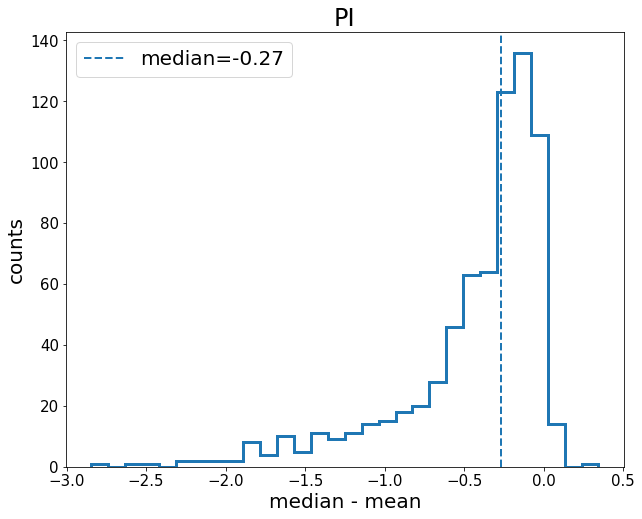

In [76]:
plt.figure(figsize=(10,8))
diff = (T['MED_PI']-T['MEAN_PI']).dropna()
plt.hist(diff,bins=30,histtype='step',lw=3)
plt.axvline(np.median(diff),ls='dashed',lw=2,label='median=%.2f'%np.median(diff))
plt.xlabel('median - mean')
plt.ylabel('counts')
plt.title('PI')
plt.legend(loc=2)
plt.show()

# Checks on baby FMC054

In [77]:
# To Understand if the measurements for FMC054 are from
# the hospital or the PHN, it's worth looking 
# at the duration of the recordings
b = baby('FMC054')

In [79]:
b.measurements[0]['PR']

0      139
1      141
2      144
3      149
4      148
      ... 
655    135
656    133
657    134
658    134
659    135
Name: PR, Length: 660, dtype: int64

In [87]:
2*len(b.measurements[1]['PR'])/60.

22.133333333333333

In [88]:
b.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_054/G_PHN_FMC054_Day3_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_054/G_PHN_FMC054_Day3_Rt Wrist.csv']

In [45]:
fmc015 = baby('FMC012')

In [46]:
fmc015.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_012/G_FMC012_Day1_Rt foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_012/G_FMC012_Day1_Rt wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_012/G_PHN_FMC012_Day4_Rt Foot final.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_012/G_PHN_FMC012_Day4_Rt wrist.csv']

107.92
124.0


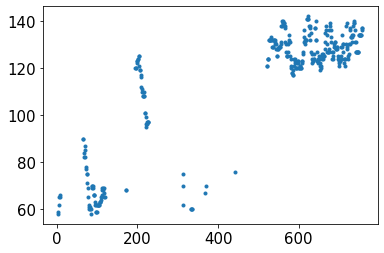

In [47]:
plt.plot(fmc015.measurements[3]['PR'][fmc015.measurements[3]['PR']>50],".")
print(np.mean(fmc015.measurements[3]['PR'][fmc015.measurements[3]['PR']>10]))
print(np.median(fmc015.measurements[3]['PR'][fmc015.measurements[3]['PR']>10]))

In [116]:
help(mean_in_bins_err)

Help on function mean_in_bins_err in module __main__:

mean_in_bins_err(x, y, x1, x2, nbins, p1=0.25, p2=0.75)



# Some other plots

# PR vs GESTATIONAL AGE

In [94]:
x = T['GEST_AGE_DAYS'][(T['WRIST']==True) & (T['PHN']==False)]/7.
y = T['MED_PR'][(T['WRIST']==True) & (T['PHN']==False)]

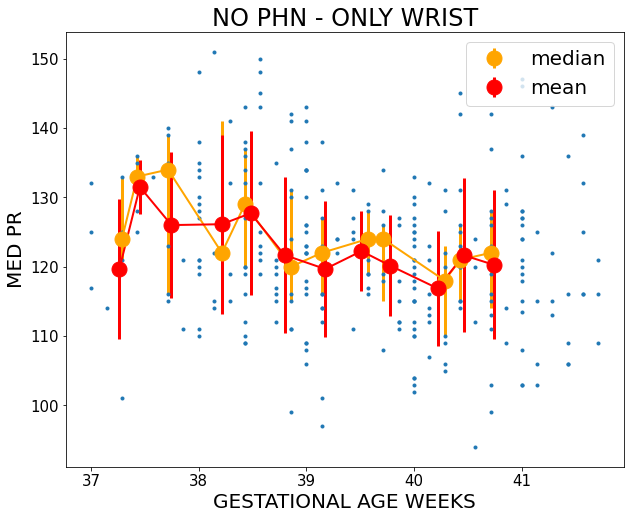

In [95]:
plt.figure(figsize=(10,8))

plt.plot(x,y,".")

xx,yy,ey1,ey2 = median_in_bins_err(x,y,37,41,12)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')
plt.plot(xx,yy,color="orange",lw=2)

xx,yy,ey = mean_in_bins_err(x,y,37,41,12)
plt.errorbar(xx,yy,yerr=ey,fmt=".",markersize=30,elinewidth=3,color='red',label ='mean')
plt.plot(xx,yy,color="red",lw=2)


plt.xlabel('GESTATIONAL AGE WEEKS')
plt.ylabel('MED PR')
plt.title('NO PHN - ONLY WRIST')
plt.legend(loc=1)
plt.show()

In [97]:
x = T['GEST_AGE_DAYS'][(T['WRIST']==True) & (T['PHN']==False)]/7.
y = T['MEAN_PR'][(T['WRIST']==True) & (T['PHN']==False)]

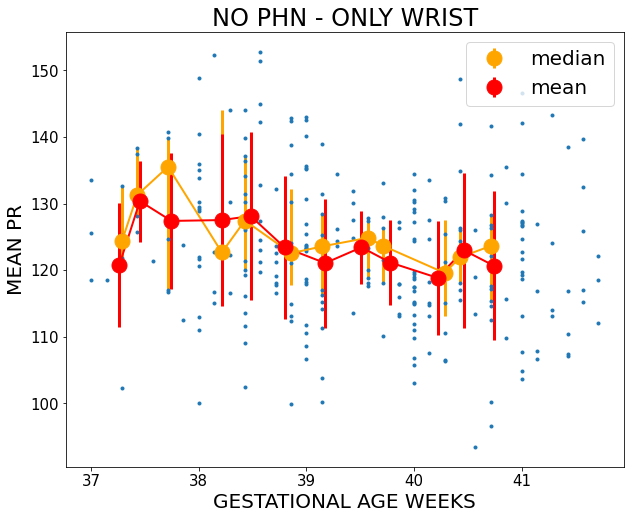

In [98]:
plt.figure(figsize=(10,8))

plt.plot(x,y,".")

xx,yy,ey1,ey2 = median_in_bins_err(x,y,37,41,12)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')
plt.plot(xx,yy,color="orange",lw=2)

xx,yy,ey = mean_in_bins_err(x,y,37,41,12)
plt.errorbar(xx,yy,yerr=ey,fmt=".",markersize=30,elinewidth=3,color='red',label ='mean')
plt.plot(xx,yy,color="red",lw=2)


plt.xlabel('GESTATIONAL AGE WEEKS')
plt.ylabel('MEAN PR')
plt.title('NO PHN - ONLY WRIST')
plt.legend(loc=1)
plt.show()